# Assignment 2: Sentiment Classification Using Logistic Regression

## Programming Assignment (100 Points scaled to 40)

For this assignment we will be implementing a naive bayes baseline classifier. Additionally, we will be using pytorch to implement a binary logistic regression classifier. Our task is sentiment classification for hotel reviews. The input to your model will be a text review, and the output label is a 1 or 0 marking it as positive or negative.

We have provided a util.py file for loading the data, and some of the basic modeling. Your task is to fill in the functions below in order to train as accurate a classifier as possible!

We suggest browsing the util.py script first. Additionally, make sure to install dependencies from the provided requirements.txt file in a similar fashion to the pytorch tutorial. With your environment activated int he terminal, run:
```
pip install -r requirements.txt
```

In [252]:
import numpy as np
import random
import torch
from util import *

## Section 1: Sentiment Classification Dataset (Total: 20 Points)

The training data for this task consists of a collection of short hotel reviews. The data is formatted as one review per line. Each line starts with a unique identifier for the review (as in ID-2001) followed by tab and the text of the review.  The reviews are not tokenized or sentence segmented in any way (the words are space separated). The positive reviews and negative reviews appear in separate files namely [hotelPosT-train.txt](data/hotelPosT-train.txt) and [hotelNegT-train.txt](data/hotelNegT-train.txt).

In [253]:
# load the dataset
pos_datapath = "data/hotelPosT-train.txt"
neg_datapath = "data/hotelNegT-train.txt"
all_texts, all_labels = load_train_data(pos_datapath, neg_datapath)

In [254]:
print(all_texts,all_labels)

['Went to this hotel when visiting nearby national parks with family. Front desk staff was courteous and quickly resolved any questions we had. Our 2-queen bed room was clean and spacious. Room has nice LCD TV, coffee maker, fridge, microwave, massaging shower heads, and good mattresses. We stayed for 2 nights and room was well cleaned and put together after first night with coffee packs refilled. Overall very satisfied.', "Over the holidays, we stayed at the Westin in St. Louis,MO. The hotel is stunning! It's located right across from the Cardinals Stadium. The hotel staff was very accommodating. We requested more towels at midnight and they were up there within minutes! The rooms were absolutely gorgeous. The beds were extremely comfortable. My daughter loved that there was a phone in the bathroom! Great experience overall.", "Beautiful resort with excellent views of the ocean. The large pool with pool bar was an excellent place to chill and unwind with my wife while we glanced over 

### Let's look at what is in the data

In [255]:
# print positive and negative examples from all_texts
def random_sample(texts, labels, label):
    data_by_label = {}
    for lab, text in zip(labels, texts):
        if lab not in data_by_label:
            data_by_label[lab] = []
        data_by_label[lab].append(text)
    return random.choice(data_by_label[label])

print("--- Positive Example ---")
print(random_sample(all_texts, all_labels, label=1))
print("\n--- Negative Example ---")
print(random_sample(all_texts, all_labels, label=0))

--- Positive Example ---
Staying at the Bon Aire on St. Pete Beach is by far the best vacation experience I have ever had in my life. The landscaping is beautiful! I couldn't believe all of the different colored flowers and plants. Also the hotel rooms were great. Everything was kept very sanitary, and the layout of the room couldn't have been better. In my opinion, the greatest plus to have staying at the Bon Aire was being able to get food and drinks all day from Sandbar Bills. Sandbar Bills makes one of the greatest cheese burgers I have ever had in my life. Everything about this resort is just all around amazing, including the location. Right across the street from the resort is a Walgreens that is open 24/7! At night when Sandbar Bills is closed, I could walk across the street and buy a snack. In conclusion, I would recommend staying at the Bon Aire over any other place if you are coming to visit St. Pete Beach. You will not be disappointed!

--- Negative Example ---
This hotel wa

### Test Data ( WAIT TILL DEADLINE)

This is the test dataset that you will need to use to report the results on. This set is the unseen dataset meaning, you are not in anyway supoose to look what is in this dataset. We will release this dataset on the last day of the assignment's deadline.

In [256]:
### RUN THIS ONLY ON DEADLINE ###
# Load the test data

test_datapath = "/data/HW2-testset.txt"
test_texts, test_labels = load_test_data(test_datapath)

FileNotFoundError: [Errno 2] No such file or directory: '/data/HW2-testset.txt'

### Task 1.1: Print the number of "positive" and "negative" samples (5 Points)

It is important to know the distribution of the training examples. More often than not, you will have to work with datasets that are not "balanced" with respect to the labels of the samples. For this task, print out the number of examples that have label = 1 and label = 0, respectively, in std:out or plot a pie chart.

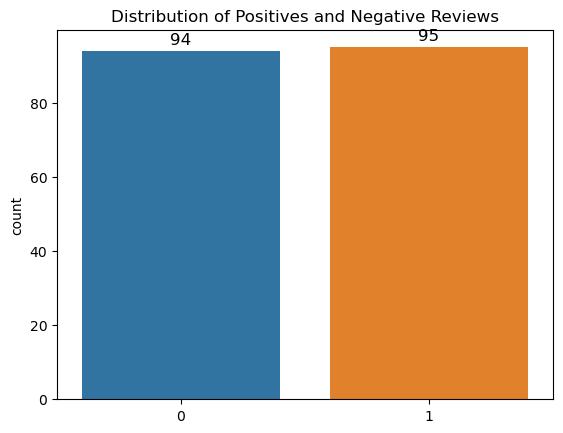

(95, 94)

In [257]:
### ENTER CODE HERE ###
import seaborn as sns
import matplotlib.pyplot as plt
def label_distribution(labels):
    """
    TODO: Replace the line `raise NotImplementedError` with your code
    to print the labels distribution.

    Args:
        labels (List[int]): Labels for the dataset. 1 = postive, 0 = negative
    
    Returns
        pos_count, neg_count (int, int): The counts of each label
    """
    
    positive_count = labels.count(1)
    negative_count = labels.count(0)
    ax = sns.countplot(x=labels)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

    plt.title('Distribution of Positives and Negative Reviews')
    plt.show()
    return positive_count,negative_count



label_distribution(all_labels)

### Task 1.2: Split Training and Development Sets (5 Points)

For the purpose of coming with the best parameters for the model you will have to split the dataset into training and development sets. Make sure the splits follow the same distribution.

Train Label Distribution:


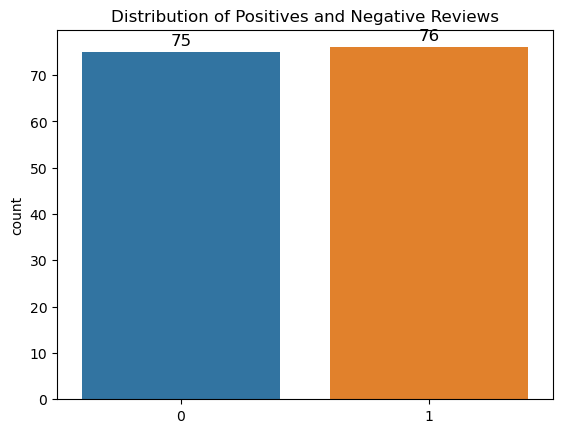

Dev Label Distribution:


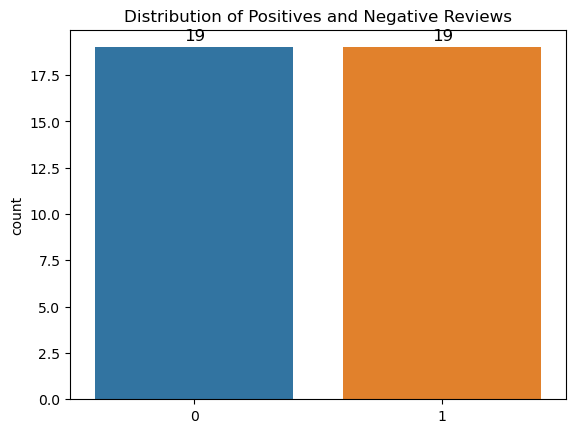

(19, 19)

In [258]:
### ENTER CODE HERE ###
import random 
def split_dataset(texts, labels):
    """
    Split the dataset randomly into 80% training and 20% development set
    Make sure the splits have the same label distribution
    """
    train_size = 0.8
    random.seed(42)

    group_text_lables = {}
    for i,j in zip(texts,labels):
        if(j not in group_text_lables):
            group_text_lables[j]=[]
        group_text_lables[j].append((i,j))
    
    train_text,train_label,dev_text,dev_label =[],[],[],[]
    for i,j in group_text_lables.items():
        random.shuffle(j)
        split_index = int(len(j)*(train_size))
        train_g = j[:split_index]
        dev_g = j[split_index:]

        for tt,tl in train_g:
            train_text.append(tt)
            train_label.append(tl)
        for dt,dl in dev_g:
            dev_text.append(dt)
            dev_label.append(dl)
    return train_text,train_label,dev_text,dev_label

    

train_texts, train_labels, dev_texts, dev_labels =  split_dataset(all_texts, all_labels)

print('Train Label Distribution:')
label_distribution(train_labels)

print('Dev Label Distribution:')
label_distribution(dev_labels)

### Task 1.3: Evaluation Metrics (10 Points)

Implement the evaulation metrics: Accuracy, Precision, Recall and F1 score

In [259]:
### ENTER CODE HERE ###
# implementing 
def accuracy(predicted_labels, true_labels):
    """
    Accuracy is correct predictions / all predicitons
    """
    correct_predictions = sum((i == j) for i,j in zip(predicted_labels,true_labels))
    accuracy_score = correct_predictions / len(true_labels)
    return torch.tensor([accuracy_score]).item()

def precision(predicted_labels, true_labels):
    """
    Precision is True Positives / All Positives Predictions
    """
    true_positives = sum((i == 1 and j == 1) for i,j in zip(predicted_labels,true_labels))
    false_positives = sum((i == 1 and j == 0) for i,j in zip(predicted_labels,true_labels))
    if(true_positives + false_positives == 0):
        return 0
    else:
        precision_score = true_positives / (true_positives + false_positives)
        return torch.tensor([precision_score]).item()

def recall(predicted_labels, true_labels):
    """
    Recall is True Positives / All Positive Labels
    """
    true_positives = sum((i == 1 and j == 1) for i,j in zip(predicted_labels,true_labels))
    false_negatives = sum((i== 0 and j == 1) for i, j in zip(predicted_labels,true_labels))
    if(true_positives + false_negatives == 0):
        return 0
    else:
        recall_Score = true_positives / (true_positives + false_negatives)
        return torch.tensor([recall_Score]).item()


def f1_score(predicted_labels, true_labels):
    """
    F1 score is the harmonic mean of precision and recall
    """
    precision_f1 = precision(predicted_labels, true_labels)
    recall_f1 = recall(predicted_labels, true_labels)
    if(precision_f1 + recall_f1 == 0):
        return 0
    else:
        f1_score_pr = (2*precision_f1*recall_f1) / (precision_f1 + recall_f1)
        return torch.tensor([f1_score_pr]).item()

    

In [260]:
### DO NOT EDIT ###

em_test_labels = [0]*6 + [1]*4
em_test_predictions = [0]*8 + [1]*2

em_test_accuracy = 0.8
em_test_precision = 1.0
em_test_recall = 0.5
em_test_f1 = 2/3

assert accuracy(em_test_predictions, em_test_labels) == em_test_accuracy
assert precision(em_test_predictions, em_test_labels) == em_test_precision 
assert recall(em_test_predictions, em_test_labels) == em_test_recall
assert f1_score(em_test_predictions, em_test_labels) == em_test_f1

print('All Test Cases Passed!')

AssertionError: 

## Section 2: Baselines (Total: 20 Points)

It is important to come up with baselines for the classifications to compare the more complicated models with. The baselines are also useful as a debugging method for your actual classfication model. You will create two baselines:

1. Random Chance
2. Naive Bayes Classifier

### Task 2.1: Random Chance Classifier (5 Points)

A random chance classifier predicts the label according to the label's distribution. As an example, if the label 1 appears 70% of the times in the training set, you predict 70 out of 100 times the label 1 and label 0 30% of the times

In [261]:
### ENTER CODE HERE ###

def predict_random(train_labels, num_samples):
    """
    Using the label distribution, predict the label num_sample number of times
    """
    train_labels = list(train_labels)
    total_labels = len(train_labels)
    unique_labels = list(set(train_labels))
    label_count = {}
    label_prob = {}
    for i in unique_labels:
        label_count[i] = train_labels.count(i)
    for i in unique_labels:
        label_prob[i] = label_count[i]/total_labels
    label_probab = list(label_prob.values())
    predicted_labels = list(np.random.choice(unique_labels, size=num_samples, p=label_probab))
    return predicted_labels
    


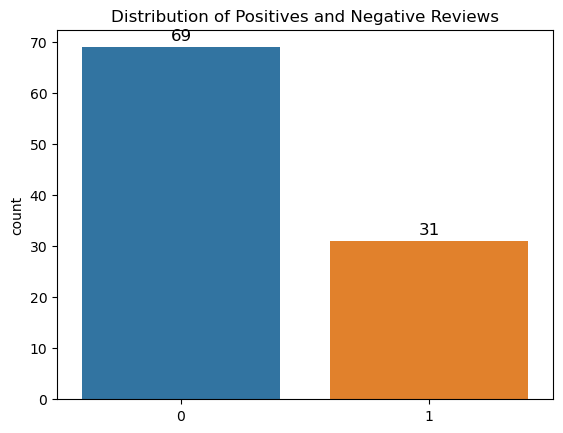

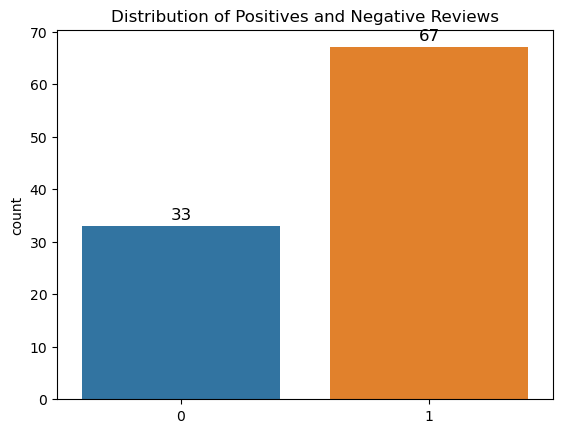

All Test Cases Passed!


In [262]:
rc_labels = np.array([1]*10 + [0]*5, dtype=int)
rc_predictions = predict_random(rc_labels, 3)
assert len(rc_predictions) == 3
assert len(set(rc_predictions).difference({0, 1})) == 0

rc_labels = np.array([0]*10 + [1]*5, dtype=int)
rc_predictions = predict_random(rc_labels, 100)
p, n = label_distribution(rc_predictions)
assert n > p

rc_labels = np.array([1]*10 + [0]*5, dtype=int)
rc_predictions = predict_random(rc_labels, 100)
p, n = label_distribution(rc_predictions)
assert p > n

print('All Test Cases Passed!')

### Task 2.2: Naive Bayes Classifier (Total: 10 Points)

In this task, you will implement a Naive Bayes Classifier using the tokens in the training sample. As a preprocessing step, you will tokenize via whitespace separation and lowercase all tokens.

### Task 2.2.2: Preprocessing (5 Points)

Tokenize text by separating by whitespace, and then lowercase all tokens.

In [263]:
### ENTER CODE HERE ###

def preprocess(text):
    """
    Takes a string of text and returns a list of the whitespace-separated and lowercased tokens.
    """
    tokens_list = text.lower().split()
    return tokens_list
    
test_string = "This sentence needs to be preprocessed."

assert preprocess(test_string) == ['this', 'sentence', 'needs', 'to', 'be', 'preprocessed.']

print('All Test Cases Passed!')

All Test Cases Passed!


### Task 2.2.3: The Naive Bayes Class (5 Points)

The standard way of implementing classifiers like Naive Bayes is to implement the two methods: "fit" and "predict". The fit method expects the training data along with labels, and the predict method predicts the labels for the provides texts of samples.

In [264]:
for i in train_texts:
    print(i)

This should definitely be one of your first choices for a place to stay on any trip to Montreal, but especially if you are visiting for pleasure. It offers a bargain price for elegant, comfortable accommodations and an authentically high-class experience - the staff is great and friendly, and will make you feel like (whether you are or not) a celebrity. Also, its downtown location is quite convenient. Overall, one of the best values you'll find.
The Residence Inn Marriott was a fantastic hotel that I have stayed in many times. The staff is extremely friendly and always remember who I am since I travel quite often to this hotel.   The rooms are more than spacious as they boast a full kitchen, full sized couch, flat screen TV, a small dining table and a desk to do work on.   Also, a few nights a week they have free food and drinks on their first floor which is very delightful.  I would recommend this hotel to anyone.
The Place Inn in Oxnard, CA is a perfect place to stay if you are trave

In [265]:
print(train_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [266]:
### ENTER CODE HERE ###
import math
class NaiveBayesClassifier:
    def __init__(self, num_classes):
        self.num_classes = num_classes
        self.label_word_counter = {} # count of each word in each label
        self.label_words_count = {} # Total number of words for each label 
        self.label_count = {} # number of samples per label
        self.vocab = set() # Vocabulary of all unique words
        self.prior_probabilities = {} # Probabilities for each class 

    
    def fit(self, texts, labels):
        """
        1. Group samples by their labels
        2. Preprocess each text
        3. Count the words of the text for each label
        """
        #grouping samples by lables using for loop 
         # in this for loop :
        # 1. extracting for the count of the words for each label 
        # 2. extracting the total number of samples(text sentences) for each labels 
        # 3. extracting the count of each words in the each label 
        # 4. and also com
        for i,j in zip(texts,labels):
            if(j not in self.label_count):
                self.label_count[j]=0
                self.label_word_counter[j]={}
                self.label_words_count[j] = 0
            self.label_count[j] = self.label_count[j] +1

            # using the same preprocess function provided above to preprocess the text data
            tokens = preprocess(i)
            self.label_words_count[j] = self.label_words_count[j] + len(tokens)
            for t in tokens:
                if(t not in self.label_word_counter[j]):
                    self.label_word_counter[j][t] = 0
                self.label_word_counter[j][t] = self.label_word_counter[j][t] +1
            self.vocab.update(tokens)
        self.total_samples = sum(self.label_count.values())

        # creating the prior probabilities for each class based on samples
        for l,t in self.label_count.items():
            self.prior_probabilities[l] = math.log(t/self.total_samples)


        

    
    def predict(self, texts):
        """
        1. Preprocess the texts
        2. Predict the class by using the likelihood with Bayes Method and Laplace Smoothing
        """
        pred_values = []
        vocab_size = len(self.vocab)
        total_samples = sum(self.label_count.values())
    
        for i in texts:
            tokens = preprocess(i)
            each_label_prob_for_each_sample ={}
            for l in range(self.num_classes):
                word_likelihood = 0
                for j in tokens:
                    word_count = self.label_word_counter.get(l,{}).get(j,0)
                    total_words_in_each_label = self.label_words_count.get(l,0)
                    #Laplace smooting
                    word_prob = (word_count+1)/(total_words_in_each_label+vocab_size)
                    word_likelihood = word_likelihood + math.log(word_prob)
                each_label_prob_for_each_sample[l] = self.prior_probabilities[l] + word_likelihood
            pred_label = max(each_label_prob_for_each_sample,key=each_label_prob_for_each_sample.get)
            pred_values.append(pred_label)
        return pred_values
            


### Task 2.3: Baseline Results  (5 Points)

Since there is not hyperparameter-tuing required for the baselines, we can use the entirety of the training set (no need to split the dataset into train and development). Report the results you achieve with the two baselines by running the following cell:

In [267]:
### DO NOT EDIT ###

### DEV SET RESULTS

testset_prediction_random = predict_random(train_labels, num_samples=len(dev_labels))
print('Random Chance F1:', f1_score(testset_prediction_random, dev_labels))

naive_bayes_classifier = NaiveBayesClassifier(num_classes=2)
naive_bayes_classifier.fit(train_texts, train_labels)
testset_predictions_nb = naive_bayes_classifier.predict(dev_texts)
print('Naive Bayes F1:', f1_score(testset_predictions_nb, dev_labels))

Random Chance F1: 0.42424243688583374
Naive Bayes F1: 0.9268292784690857


In [268]:
### DO NOT EDIT ###
### RUN THIS ONLY ON DEADLINE ###
### TEST SET RESULTS

testset_prediction_random = predict_random(all_labels, num_samples=len(test_labels))
print('Random Chance F1:', f1_score(testset_prediction_random, test_labels))

naive_bayes_classifier = NaiveBayesClassifier(num_classes=2)
naive_bayes_classifier.fit(all_texts, all_labels)
testset_predictions_nb = naive_bayes_classifier.predict(test_texts)
print('Naive Bayes F1:', f1_score(testset_predictions_nb, test_labels))

NameError: name 'test_labels' is not defined

## Section 3: Logistic Regression on Features (Total: 60 Points)

Now let's try building a logistic regression based classifier on hand-engineered features.

The following tasks are going to be the implementation of the components required in building a Logistic Regressor.

### Task 3.0: Feature Extraction (20 points)

This is perhaps the most challenging part of this assignment. In the class, we went over how to featurize text for a classification system for sentiment analysis. In this assignment, you should implement and build upon this to accuractely classify the hotel reviews.

This task requires a thorough understanding of the dataset to answer the important question, "What is in the data?". Please go through some of the datapoints and convert the signals that you think might help in identifying "sentiment" as features.

Please refer to the section in Jim's book that illustrates the process of feature engineering for this task. We have attached an image of the table below:

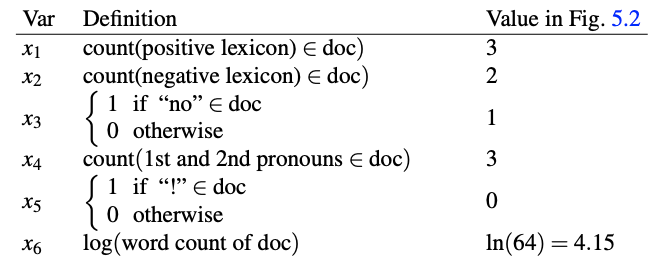

Please use the files with postive and negative words attached in the assignment: [positive_words.txt](data/poisitive-words.txt) and  [negative_words.txt](data/negative-words.txt)

In [334]:
with open("/Users/jagadeeshnadimpalli/Desktop/BOULDER/CUB_Semesters/Sem3_Fall2024/NLP/Assignment2_Sentiment_Analysis/data/positive-words.txt",'r') as f:
    positive_words = list(set(f.read().splitlines()))

with open("/Users/jagadeeshnadimpalli/Desktop/BOULDER/CUB_Semesters/Sem3_Fall2024/NLP/Assignment2_Sentiment_Analysis/data/negative-words.txt",'r') as f:
   negative_words = list(set(f.read().splitlines()))

In [335]:
print("positive words:------",len(positive_words))
print(positive_words)
print("negative words:------",len(negative_words))
print(negative_words)

positive words:------ 2006
['properly', 'passionate', 'envy', 'powerful', 'jaw-dropping', 'cherish', 'seamless', 'astutely', 'zeal', 'recommended', 'steadfastness', 'lucid', 'eminence', 'revere', 'endorses', 'danke', 'glitz', 'reconciliation', 'adoringly', 'twinkly', 'heroic', 'wows', 'cushy', 'perseverance', 'glamorous', 'luxuriously', 'priceless', 'eases', 'softer', 'productively', 'commend', 'elegant', 'nobly', 'congratulations', 'hallowed', 'noteworthy', 'dote', 'humorously', 'illumine', 'survival', 'profound', 'pepping', 'favored', 'gush', 'leads', 'grateful', 'spotless', 'appreciated', 'exonerate', 'prettily', 'terrific', 'hail', 'sweeping', 'tender', 'cleared', 'kindliness', 'liking', 'neatly', 'delicacy', 'enrapt', 'revelation', 'toll-free', 'notably', 'charmingly', 'exceeds', 'purposeful', 'tantalize', 'victorious', 'useful', 'desiring', 'pain-free', 'astonish', 'enchanted', 'trusted', 'thrive', 'laudable', 'ideally', 'consummate', 'aver', 'enthralled', 'dirt-cheap', 'blessing

In [336]:
# def make_test_feature(text):
#     return "happy" in text

def count_positive_words_feature1(text):
    return len([i for i in text if(i in positive_words)])

def count_negative_words_feature2(text):
    return len([i for i in text if(i in negative_words)])

def checking_no_feature3(text):
    return 1 if('no' in text) else 0

def counting_pronouns_feature4(text):
    all_pronouns = ['i', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours','you', 'your', 'yours']
    return len([i for i in text if(i in all_pronouns)])


def checking_exclamatory_feature5(text):
    return 1 if('!' in text) else 0

def log_word_count_of_each_doc_feature6(text):
    return math.log(len(text)) if(len(text)>0) else 0 


def extract_features(text):
    features = []
    # TODO: Replace this with your own feature extraction functions.
    # features.append(make_test_feature(text))
    # TODO: add more features to the feature vector
    features.append(count_positive_words_feature1(text))
    features.append(count_negative_words_feature2(text))
    features.append(checking_no_feature3(text))
    features.append(counting_pronouns_feature4(text))
    features.append(checking_exclamatory_feature5(text))
    features.append(log_word_count_of_each_doc_feature6(text))
    
    return features

In [337]:
### ENTER CODE HERE ###
### DO NOT CHANGE THE SIGNATURE OF THE function THOUGH ###

def featurize_data(texts, labels):
    features = [
        extract_features(preprocess(text)) for text in texts
    ]
    return torch.FloatTensor(features), torch.FloatTensor(labels)

### Task 3.0.2: Feature Scaling (10 Points)

In this task we will use the data normalization technique to ensure the scales of the feature are consistent.
After featurizing the dataset, we need to call the following function before passing it to the classifier

#### Normalization Formula

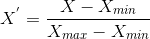

In [338]:
# features_testing_out = torch.tensor([
#     [0.5, 1.0, 3.0],  # Features for document 1
#     [0.1, 2.0, 4.0],  # Features for document 2
#     [0.9, 0.5, 2.0],  # Features for document 3
# ])

# min_vals = torch.min(features_testing_out, dim=0).values  # min_vals = [0.1, 0.5, 2.0]
# max_vals = torch.max(features_testing_out, dim=0).values  # max_vals = [0.9, 2.0, 4.0]

# print(min_vals)
# print(max_vals)

# denominator = max_vals - min_vals
# print(denominator)
# print((features_testing_out - min_vals) / denominator)

In [339]:
### ENTER CODE HERE ###

def normalize(features: torch.Tensor) -> torch.Tensor:
    """
    return the features transformed by the above formula of normalization
    """
    min_values = torch.min(features,dim=0).values
    max_values = torch.max(features,dim=0).values

    denom = max_values - min_values
    denom[denom == 0] = 1

    normalised_features = (features - min_values)/(denom)

    return normalised_features

    

## Training a Logistic Regression Classifier (Total: 30 Points)

In this section, you will implement the components needed to train the binary classifier using logistic regression

### Here we define our pytorch logistic regression classifier (DO NOT EDIT THIS)

In [340]:
class SentimentClassifier(torch.nn.Module):
    def __init__(self, input_dim: int):
        super().__init__()
        # We force output to be one, since we are doing binary logistic regression
        self.output_size = 1
        self.coefficients = torch.nn.Linear(input_dim, self.output_size)
        # Initialize weights. Note that this is not strictly necessary,
        # but you should test different initializations per lecture
        initialize_weights(self.coefficients)
        
    def forward(self, features: torch.Tensor):
        # We predict a number by multipling by the coefficients
        # and then take the sigmoid to turn the score as logits
        return torch.sigmoid(self.coefficients(features))

### Task 3.1: Initialize the weights. (5 Points)

Initialization of the parameters is an important step to ensure the SGD algorithm converges to a global optimum. Typically, we need to try different initialization methods and compare the accuracy we achieve for the development set. In this task, implement the function that initializes the parameters to ones.

In [341]:
### ENTER CODE HERE ###
def initialize_weights(coefficients):
    """
    TODO: Replace the line `raise NotImplementedError` with your code.
    Initialize the weights of the coefficients by assigning the parameter
    coefficients.weights.data = ...
    """
    coefficients.weight.data = torch.nn.init.ones_(coefficients.weight)

In [342]:
test_module = torch.nn.Linear(5, 1)
initialize_weights(test_module)
assert test_module.weight.ravel().tolist() == [1.0, 1.0, 1.0, 1.0, 1.0]

print('All Test Cases Passed!')

All Test Cases Passed!


Fill in the loss function by implementing binary cross-entropy loss between the prediction and label. As a reminder, binary cross-entropy loss between the prediction y_hat and the target y, averaged over N examples, is:

![loss.png](attachment:loss.png)

### Task 3.2: Logistic Loss Function (10 Points)

In [343]:
### ENTER CODE HERE ###

def logistic_loss(prediction: torch.Tensor, label: torch.Tensor) -> torch.Tensor:
    """
    TODO: Implement the logistic loss function between a prediction and label.
    """
    loss = 0
    prediction = prediction.flatten()
    label = label.flatten()

    for i in range(prediction.size(0)):
        pred_val = prediction[i]
        label_val = label[i]
        if(pred_val == 0):
            log_pred = 0  # Avoid log(0), set to 0
        else:
            log_pred = torch.log(pred_val)
            
        if(pred_val == 1):
            log_one_minus_pred = 0  # Avoid log(1-1), set to 0
        else:
            log_one_minus_pred = torch.log(1 - pred_val)

        loss = loss - (label_val * log_pred + (1 - label_val) * log_one_minus_pred)
    
    mean_samples = prediction.size(0)
    return loss / mean_samples

In [344]:
# Sanity check
sample_input = torch.FloatTensor([[1,1],[0.0,0.0]])
sample_target = torch.FloatTensor([[1,1],[0,0]])
sample_output = logistic_loss(sample_input, sample_target)
assert sample_output.item() == 0.0

### Task 3.3: Create an SGD optimizer (0 Points)

We have already provided the implementation of how to create the SGD optimizer

You may try different optimizers refering to the docs provided

In [349]:
### ENTER CODE HERE ###

def make_optimizer(model, learning_rate) -> torch.optim:
    """
    Returns an Stocastic Gradient Descent Optimizer
    See here for algorithms you can import: https://pytorch.org/docs/stable/optim.html
    """
    return torch.optim.Adam(model.parameters(), learning_rate)

### Task 3.5: Converting Logits into Predictions (5 Points)

In [350]:
### ENTER CODE HERE ###

def predict(model, features):
    with torch.no_grad():
        """
        TODO: Replace the line `raise NotImplementedError`
        with the logic of converting the logits into prediction labels (0, 1)
        """
        logits = model(features)
        return torch.round(logits)
        

### Training Function (DO NOT EDIT THIS)

In [351]:
### DO NOT EDIT ###

from tqdm.autonotebook import tqdm
import random


def training_loop(
    num_epochs,
    batch_size,
    train_features,
    train_labels,
    dev_features,
    dev_labels,
    optimizer,
    model
):
    samples = list(zip(train_features, train_labels))
    random.shuffle(samples)
    batches = []
    for i in range(0, len(samples), batch_size):
        batches.append(samples[i:i+batch_size])
    print("Training...")
    for i in range(num_epochs):
        losses = []
        for batch in tqdm(batches):
            # Empty the dynamic computation graph
            features, labels = zip(*batch)
            features = torch.stack(features)
            labels = torch.stack(labels)
            optimizer.zero_grad()
            # Run the model
            logits = model(features)
            # Compute loss
            loss = logistic_loss(torch.squeeze(logits), labels)
            # In this logistic regression example,
            # this entails computing a single gradient
            loss.backward()
            # Backpropogate the loss through our model
            
            # Update our coefficients in the direction of the gradient.
            optimizer.step()
             # For logging
            losses.append(loss.item())
        
        # Estimate the f1 score for the development set
        dev_f1 = f1_score(predict(model, dev_features), dev_labels)
        print(f"epoch {i}, loss: {sum(losses)/len(losses)}")
        print(f"Dev F1 {dev_f1}")
        
    # Return the trained model
    return model

### Task 3.6: Train the classifier (10 Points)

Run the following cell to train a logistic regressor on your hand-engineered features.

In [352]:
### DO NOT EDIT ###

num_epochs = 450

train_features, train_labels_tensor = featurize_data(train_texts, train_labels)
train_features = normalize(train_features)
dev_features, dev_labels_tensor = featurize_data(dev_texts, dev_labels)
dev_features = normalize(dev_features)
model = SentimentClassifier(train_features.shape[1]) 
optimizer = make_optimizer(model, learning_rate=0.01)

trained_model = training_loop(
    num_epochs,
    16,
    train_features,
    train_labels_tensor,
    dev_features,
    dev_labels_tensor,
    optimizer,
    model
)

Training...


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 0, loss: 0.9718915104866028
Dev F1 0.6785714030265808


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 1, loss: 0.9101555228233338
Dev F1 0.6666666865348816


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 2, loss: 0.8582048058509827
Dev F1 0.6666666865348816


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 3, loss: 0.8158178567886353
Dev F1 0.6792452931404114


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 4, loss: 0.782207453250885
Dev F1 0.6538461446762085


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 5, loss: 0.755898118019104
Dev F1 0.6666666865348816


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 6, loss: 0.735166335105896
Dev F1 0.6938775181770325


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 7, loss: 0.7183958888053894
Dev F1 0.7083333134651184


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 8, loss: 0.7042813420295715
Dev F1 0.7234042286872864


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 9, loss: 0.6918856739997864
Dev F1 0.739130437374115


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 10, loss: 0.6806004166603088
Dev F1 0.7555555701255798


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 11, loss: 0.6700635075569152
Dev F1 0.7555555701255798


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 12, loss: 0.6600748181343079
Dev F1 0.7555555701255798


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 13, loss: 0.6505298554897309
Dev F1 0.7555555701255798


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 14, loss: 0.6413753628730774
Dev F1 0.7727272510528564


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 15, loss: 0.6325829505920411
Dev F1 0.7727272510528564


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 16, loss: 0.6241351187229156
Dev F1 0.7906976342201233


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 17, loss: 0.6160184741020203
Dev F1 0.7906976342201233


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 18, loss: 0.6082208096981049
Dev F1 0.7906976342201233


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 19, loss: 0.6007300853729248
Dev F1 0.7906976342201233


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 20, loss: 0.593533992767334
Dev F1 0.7906976342201233


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 21, loss: 0.5866201281547546
Dev F1 0.8181818723678589


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 22, loss: 0.5799761831760406
Dev F1 0.8181818723678589


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 23, loss: 0.5735897839069366
Dev F1 0.8181818723678589


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 24, loss: 0.5674489855766296
Dev F1 0.8181818723678589


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 25, loss: 0.5615419805049896
Dev F1 0.8181818723678589


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 26, loss: 0.5558574110269546
Dev F1 0.8181818723678589


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 27, loss: 0.5503842800855636
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 28, loss: 0.5451120972633362
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 29, loss: 0.5400307327508926
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 30, loss: 0.5351305454969406
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 31, loss: 0.5304023772478104
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 32, loss: 0.5258374840021134
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 33, loss: 0.5214275777339935
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 34, loss: 0.5171648740768433
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 35, loss: 0.5130418956279754
Dev F1 0.8837209343910217


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 36, loss: 0.5090516984462738
Dev F1 0.8837209343910217


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 37, loss: 0.5051876783370972
Dev F1 0.8837209343910217


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 38, loss: 0.501443612575531
Dev F1 0.8837209343910217


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 39, loss: 0.49781361520290374
Dev F1 0.8837209343910217


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 40, loss: 0.49429217875003817
Dev F1 0.8837209343910217


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 41, loss: 0.4908741503953934
Dev F1 0.8837209343910217


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 42, loss: 0.48755464255809783
Dev F1 0.8837209343910217


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 43, loss: 0.4843290328979492
Dev F1 0.8837209343910217


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 44, loss: 0.48119309842586516
Dev F1 0.8837209343910217


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 45, loss: 0.4781427264213562
Dev F1 0.8837209343910217


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 46, loss: 0.47517412304878237
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 47, loss: 0.47228372991085055
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 48, loss: 0.46946817338466645
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 49, loss: 0.4667243152856827
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 50, loss: 0.4640491545200348
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 51, loss: 0.46143986880779264
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 52, loss: 0.45889386236667634
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 53, loss: 0.4564086228609085
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 54, loss: 0.45398184657096863
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 55, loss: 0.4516113042831421
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 56, loss: 0.4492949068546295
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 57, loss: 0.44703072905540464
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 58, loss: 0.4448168307542801
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 59, loss: 0.4426514744758606
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 60, loss: 0.4405330061912537
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 61, loss: 0.43845982253551485
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 62, loss: 0.4364304542541504
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 63, loss: 0.43444347083568574
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 64, loss: 0.43249751925468444
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 65, loss: 0.4305912762880325
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 66, loss: 0.42872353494167326
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 67, loss: 0.4268931567668915
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 68, loss: 0.42509897947311404
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 69, loss: 0.42333996295928955
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 70, loss: 0.4216151088476181
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 71, loss: 0.4199234277009964
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 72, loss: 0.4182639867067337
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 73, loss: 0.41663590669631956
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 74, loss: 0.4150383770465851
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 75, loss: 0.4134704887866974
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 76, loss: 0.41193155348300936
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 77, loss: 0.4104207456111908
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 78, loss: 0.4089373618364334
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 79, loss: 0.4074807345867157
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 80, loss: 0.40605016350746154
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 81, loss: 0.4046450138092041
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 82, loss: 0.4032646507024765
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 83, loss: 0.40190849006175994
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 84, loss: 0.40057595670223234
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 85, loss: 0.39926646649837494
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 86, loss: 0.39797947704792025
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 87, loss: 0.39671447575092317
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 88, loss: 0.39547097980976104
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 89, loss: 0.3942484766244888
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 90, loss: 0.39304650723934176
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 91, loss: 0.39186459183692934
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 92, loss: 0.39070228934288026
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 93, loss: 0.3895591557025909
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 94, loss: 0.3884348452091217
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 95, loss: 0.3873288631439209
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 96, loss: 0.3862408310174942
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 97, loss: 0.38517040610313413
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 98, loss: 0.3841171860694885
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 99, loss: 0.383080792427063
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 100, loss: 0.382060906291008
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 101, loss: 0.3810572147369385
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 102, loss: 0.3800693154335022
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 103, loss: 0.3790969133377075
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 104, loss: 0.3781397193670273
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 105, loss: 0.3771973758935928
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 106, loss: 0.3762696489691734
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 107, loss: 0.37535618543624877
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 108, loss: 0.3744567483663559
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 109, loss: 0.373571015894413
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 110, loss: 0.3726987883448601
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 111, loss: 0.37183974534273145
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 112, loss: 0.370993635058403
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 113, loss: 0.37016025334596636
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 114, loss: 0.3693393304944038
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 115, loss: 0.3685305923223495
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 116, loss: 0.36773385256528857
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 117, loss: 0.36694889664649966
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 118, loss: 0.3661754742264748
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 119, loss: 0.3654133856296539
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 120, loss: 0.36466240882873535
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 121, loss: 0.3639223426580429
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 122, loss: 0.36319299340248107
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 123, loss: 0.362474137544632
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 124, loss: 0.36176563799381256
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 125, loss: 0.36106729656457903
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 126, loss: 0.3603788986802101
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 127, loss: 0.35970025807619094
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 128, loss: 0.35903124511241913
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 129, loss: 0.3583716660737991
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 130, loss: 0.3577213704586029
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 131, loss: 0.3570801794528961
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 132, loss: 0.3564479187130928
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 133, loss: 0.3558244839310646
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 134, loss: 0.35520966798067094
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 135, loss: 0.3546033680438995
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 136, loss: 0.354005429148674
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 137, loss: 0.35341566801071167
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 138, loss: 0.3528339624404907
Dev F1 0.8444444537162781


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 139, loss: 0.35226021260023116
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 140, loss: 0.35169425904750823
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 141, loss: 0.35113598108291627
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 142, loss: 0.3505852401256561
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 143, loss: 0.3500418856739998
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 144, loss: 0.34950584173202515
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 145, loss: 0.34897698014974593
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 146, loss: 0.3484551772475243
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 147, loss: 0.3479403033852577
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 148, loss: 0.3474322661757469
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 149, loss: 0.3469309449195862
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 150, loss: 0.34643620252609253
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 151, loss: 0.3459479779005051
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 152, loss: 0.34546615928411484
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 153, loss: 0.3449906289577484
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 154, loss: 0.34452132433652877
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 155, loss: 0.34405809342861177
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 156, loss: 0.3436008542776108
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 157, loss: 0.34314955323934554
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 158, loss: 0.3427040487527847
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 159, loss: 0.342264261841774
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 160, loss: 0.34183012396097184
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 161, loss: 0.3414015769958496
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 162, loss: 0.3409784629940987
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 163, loss: 0.3405607283115387
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 164, loss: 0.3401483029127121
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 165, loss: 0.3397411122918129
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 166, loss: 0.339339017868042
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 167, loss: 0.33894202411174773
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 168, loss: 0.3385500371456146
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 169, loss: 0.33816292583942414
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 170, loss: 0.33778066486120223
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 171, loss: 0.3374031573534012
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 172, loss: 0.33703034222126005
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 173, loss: 0.336662195622921
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 174, loss: 0.33629857301712035
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 175, loss: 0.335939447581768
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 176, loss: 0.3355847492814064
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 177, loss: 0.3352344572544098
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 178, loss: 0.3348884373903275
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 179, loss: 0.3345466569066048
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 180, loss: 0.3342090412974358
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 181, loss: 0.3338755503296852
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 182, loss: 0.3335461258888245
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 183, loss: 0.3332206979393959
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 184, loss: 0.3328992024064064
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 185, loss: 0.33258162140846254
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 186, loss: 0.33226785957813265
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 187, loss: 0.3319578617811203
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 188, loss: 0.3316516101360321
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 189, loss: 0.33134900629520414
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 190, loss: 0.3310500606894493
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 191, loss: 0.33075467497110367
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 192, loss: 0.33046281039714814
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 193, loss: 0.3301744282245636
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 194, loss: 0.3298894435167313
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 195, loss: 0.3296078771352768
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 196, loss: 0.32932961285114287
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 197, loss: 0.3290546625852585
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 198, loss: 0.32878296822309494
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 199, loss: 0.32851445972919463
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 200, loss: 0.32824910879135133
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 201, loss: 0.32798685431480407
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 202, loss: 0.3277276799082756
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 203, loss: 0.3274715289473534
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 204, loss: 0.3272183835506439
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 205, loss: 0.3269681915640831
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 206, loss: 0.32672088146209716
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 207, loss: 0.3264764904975891
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 208, loss: 0.3262349098920822
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 209, loss: 0.3259960874915123
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 210, loss: 0.3257600724697113
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 211, loss: 0.3255267575383186
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 212, loss: 0.32529615312814714
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 213, loss: 0.32506818473339083
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 214, loss: 0.3248428404331207
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 215, loss: 0.3246200680732727
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 216, loss: 0.3243998572230339
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 217, loss: 0.32418215423822405
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 218, loss: 0.3239669367671013
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 219, loss: 0.3237541809678078
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 220, loss: 0.3235438376665115
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 221, loss: 0.32333588153123854
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 222, loss: 0.32313030809164045
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 223, loss: 0.3229270502924919
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 224, loss: 0.32272606790065766
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 225, loss: 0.32252736687660216
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 226, loss: 0.32233092188835144
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 227, loss: 0.32213670015335083
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 228, loss: 0.32194462716579436
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 229, loss: 0.32175471633672714
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 230, loss: 0.32156694382429124
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 231, loss: 0.3213812917470932
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 232, loss: 0.32119772732257845
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 233, loss: 0.32101616710424424
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 234, loss: 0.32083666771650315
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 235, loss: 0.32065915167331693
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 236, loss: 0.3204836085438728
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 237, loss: 0.32031004428863524
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 238, loss: 0.32013836652040484
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 239, loss: 0.3199686139822006
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 240, loss: 0.3198007300496101
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 241, loss: 0.3196347147226334
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 242, loss: 0.31947051286697387
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 243, loss: 0.31930813789367674
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 244, loss: 0.31914753168821336
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 245, loss: 0.3189887210726738
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 246, loss: 0.31883164644241335
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 247, loss: 0.31867627501487733
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 248, loss: 0.31852259635925295
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 249, loss: 0.3183706223964691
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 250, loss: 0.31822029799222945
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 251, loss: 0.3180716261267662
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 252, loss: 0.31792455464601516
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 253, loss: 0.3177791088819504
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 254, loss: 0.317635215818882
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 255, loss: 0.3174929141998291
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 256, loss: 0.3173521339893341
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 257, loss: 0.3172129139304161
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 258, loss: 0.31707517951726916
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 259, loss: 0.3169389083981514
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 260, loss: 0.3168041259050369
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 261, loss: 0.3166708186268806
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 262, loss: 0.3165389120578766
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 263, loss: 0.3164084404706955
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 264, loss: 0.3162793591618538
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 265, loss: 0.31615168452262876
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 266, loss: 0.31602535396814346
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 267, loss: 0.3159003868699074
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 268, loss: 0.3157767578959465
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 269, loss: 0.31565443277359007
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 270, loss: 0.31553344428539276
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 271, loss: 0.3154137134552002
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 272, loss: 0.31529528051614764
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 273, loss: 0.3151780888438225
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 274, loss: 0.315062153339386
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 275, loss: 0.3149474531412125
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 276, loss: 0.3148339420557022
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 277, loss: 0.31472165137529373
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 278, loss: 0.31461053192615507
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 279, loss: 0.31450059562921523
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 280, loss: 0.31439180821180346
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 281, loss: 0.31428416818380356
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 282, loss: 0.31417767852544787
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 283, loss: 0.31407227367162704
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 284, loss: 0.3139679983258247
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 285, loss: 0.3138648197054863
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 286, loss: 0.3137626931071281
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 287, loss: 0.31366166472435
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 288, loss: 0.3135616660118103
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 289, loss: 0.31346272975206374
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 290, loss: 0.31336482614278793
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 291, loss: 0.3132679060101509
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 292, loss: 0.3131720259785652
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 293, loss: 0.3130771204829216
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 294, loss: 0.31298319399356844
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 295, loss: 0.3128902420401573
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 296, loss: 0.312798285484314
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 297, loss: 0.31270722299814224
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 298, loss: 0.3126171603798866
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 299, loss: 0.31252799481153487
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 300, loss: 0.31243972182273866
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 301, loss: 0.31235239654779434
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 302, loss: 0.31226594746112823
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 303, loss: 0.3121803760528564
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 304, loss: 0.31209568977355956
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 305, loss: 0.3120118618011475
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 306, loss: 0.3119289055466652
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 307, loss: 0.31184676140546796
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 308, loss: 0.31176547706127167
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 309, loss: 0.31168501973152163
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 310, loss: 0.31160537898540497
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 311, loss: 0.3115265414118767
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 312, loss: 0.31144849509000777
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 313, loss: 0.3113712415099144
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 314, loss: 0.31129475831985476
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 315, loss: 0.3112190723419189
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 316, loss: 0.31114412993192675
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 317, loss: 0.3110699445009232
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 318, loss: 0.31099650263786316
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 319, loss: 0.3109238013625145
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 320, loss: 0.31085183620452883
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 321, loss: 0.31078057140111925
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 322, loss: 0.31071001291275024
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 323, loss: 0.3106401801109314
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 324, loss: 0.3105710357427597
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 325, loss: 0.31050257235765455
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 326, loss: 0.3104347825050354
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 327, loss: 0.31036766767501833
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 328, loss: 0.3103012338280678
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 329, loss: 0.3102354481816292
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 330, loss: 0.31017031967639924
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 331, loss: 0.3101057976484299
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 332, loss: 0.3100419357419014
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 333, loss: 0.30997870713472364
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 334, loss: 0.30991608202457427
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 335, loss: 0.3098540633916855
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 336, loss: 0.30979268103837965
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 337, loss: 0.30973184406757354
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 338, loss: 0.3096716672182083
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 339, loss: 0.30961204171180723
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 340, loss: 0.3095529794692993
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 341, loss: 0.30949450433254244
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 342, loss: 0.30943662524223325
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 343, loss: 0.3093792751431465
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 344, loss: 0.3093224838376045
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 345, loss: 0.3092662200331688
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 346, loss: 0.3092105150222778
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 347, loss: 0.3091553315520287
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 348, loss: 0.30910070389509203
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 349, loss: 0.30904659628868103
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 350, loss: 0.3089930057525635
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 351, loss: 0.30893990099430085
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 352, loss: 0.30888731628656385
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 353, loss: 0.30883524715900423
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 354, loss: 0.3087836354970932
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 355, loss: 0.3087325423955917
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 356, loss: 0.30868192464113237
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 357, loss: 0.30863177329301833
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 358, loss: 0.30858210325241087
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 359, loss: 0.3085328981280327
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 360, loss: 0.3084841459989548
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 361, loss: 0.3084358602762222
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 362, loss: 0.308388015627861
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 363, loss: 0.30834065079689027
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 364, loss: 0.30829366147518156
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 365, loss: 0.30824715942144393
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 366, loss: 0.3082011044025421
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 367, loss: 0.3081554487347603
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 368, loss: 0.3081101983785629
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 369, loss: 0.3080653965473175
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 370, loss: 0.3080210030078888
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 371, loss: 0.3079769998788834
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 372, loss: 0.3079334169626236
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 373, loss: 0.3078902095556259
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 374, loss: 0.3078474044799805
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 375, loss: 0.3078050032258034
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 376, loss: 0.3077629655599594
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 377, loss: 0.3077213242650032
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 378, loss: 0.3076800689101219
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 379, loss: 0.30763917714357375
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 380, loss: 0.307598651945591
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 381, loss: 0.3075584888458252
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 382, loss: 0.3075186923146248
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 383, loss: 0.3074792370200157
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 384, loss: 0.3074401572346687
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 385, loss: 0.30740142464637754
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 386, loss: 0.3073630228638649
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 387, loss: 0.30732498317956924
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 388, loss: 0.3072872593998909
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 389, loss: 0.3072498768568039
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 390, loss: 0.30721280425786973
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 391, loss: 0.3071760892868042
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 392, loss: 0.3071396708488464
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 393, loss: 0.3071035861968994
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 394, loss: 0.30706780552864077
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 395, loss: 0.3070323601365089
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 396, loss: 0.3069972038269043
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 397, loss: 0.3069623723626137
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 398, loss: 0.3069277971982956
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 399, loss: 0.30689355731010437
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 400, loss: 0.3068596124649048
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 401, loss: 0.3068259656429291
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 402, loss: 0.30679260939359665
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 403, loss: 0.30675950050354006
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 404, loss: 0.3067267000675201
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 405, loss: 0.30669418573379514
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 406, loss: 0.30666192919015883
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 407, loss: 0.3066299632191658
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 408, loss: 0.30659827440977094
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 409, loss: 0.30656681060791013
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 410, loss: 0.3065356478095055
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 411, loss: 0.3065047666430473
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 412, loss: 0.3064741060137749
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 413, loss: 0.30644369274377825
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 414, loss: 0.3064135581254959
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 415, loss: 0.3063836693763733
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 416, loss: 0.306354022026062
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 417, loss: 0.30632463097572327
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 418, loss: 0.30629548728466033
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 419, loss: 0.3062665700912476
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 420, loss: 0.30623790323734285
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 421, loss: 0.30620945543050765
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 422, loss: 0.30618125200271606
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 423, loss: 0.3061532750725746
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 424, loss: 0.3061255067586899
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 425, loss: 0.30609799474477767
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 426, loss: 0.30607067197561266
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 427, loss: 0.30604363083839414
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 428, loss: 0.30601671785116197
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 429, loss: 0.3059900775551796
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 430, loss: 0.3059636399149895
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 431, loss: 0.30593740940093994
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 432, loss: 0.30591137856245043
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 433, loss: 0.3058855667710304
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 434, loss: 0.30585997104644774
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 435, loss: 0.30583456307649615
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 436, loss: 0.30580933541059496
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 437, loss: 0.3057843342423439
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 438, loss: 0.3057595193386078
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 439, loss: 0.3057349145412445
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 440, loss: 0.3057104781270027
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 441, loss: 0.3056862384080887
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 442, loss: 0.30566219091415403
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 443, loss: 0.3056383147835732
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 444, loss: 0.305614647269249
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 445, loss: 0.3055911332368851
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 446, loss: 0.3055678516626358
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 447, loss: 0.3055446699261665
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 448, loss: 0.30552169382572175
Dev F1 0.8636363744735718


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 449, loss: 0.305498893558979
Dev F1 0.8636363744735718


### Task 3.7: Get the predictions on the Test Set using the Trained model and print the F1 score (10 Points)

In [353]:
### DO NOT EDIT ###

### DEV SET RESULTS

train_texts, train_labels, dev_texts, dev_labels = split_dataset(all_texts, all_labels)

devset_prediction_random = predict_random(train_labels, num_samples=len(dev_labels))
dev_random_f1 = f1_score(devset_prediction_random, dev_labels)
print('Random Chance F1:', dev_random_f1)

assert dev_random_f1 > 0

print('All Test Cases Passed!')

Random Chance F1: 0.42105263471603394
All Test Cases Passed!


In [354]:
### DO NOT EDIT ###
### DEV SET RESULTS - LOGISTIC REGRESSION

dev_features, dev_labels = featurize_data(dev_texts, dev_labels)
dev_features = normalize(dev_features)
dev_logistic_accuracy = accuracy(predict(trained_model, dev_features), dev_labels.tolist())
dev_logistic_f1 = f1_score(predict(trained_model, dev_features), dev_labels.tolist())
print('Logistic Regression Results:')
print('Accuracy:', dev_logistic_accuracy)
print('F1-score', dev_logistic_f1)

Logistic Regression Results:
Accuracy: 0.8421052694320679
F1-score 0.8636363744735718


In [286]:
### TEST SET RESULTS - RANDOM CHANCE
### DO NOT EDIT ###

# load the test data
test_datapath = "data/HW2-testset.txt"
test_texts, test_labels = load_test_data(test_datapath)

testset_prediction_random = predict_random(all_labels, num_samples=len(test_labels))
test_random_f1 = f1_score(testset_prediction_random, test_labels)
print('Random Chance F1:', test_random_f1)
testset_prediction_naive = naive_bayes_classifier.predict(test_texts)
test_naive_f1 = f1_score(testset_prediction_naive, test_labels)
print('Naive Bayes F1:', test_naive_f1)

FileNotFoundError: [Errno 2] No such file or directory: 'data/HW2-testset.txt'

In [287]:
### DO NOT EDIT ###
### RUN THIS ONLY ON DEADLINE ###
### TEST SET RESULTS

# load the test data
test_datapath = "data/HW2-testset.txt"
test_texts, test_labels = load_test_data(test_datapath)

test_features, test_labels = featurize_data(test_texts, test_labels)
test_features = normalize(test_features)
test_logistic_accuracy = accuracy(predict(trained_model, test_features), test_labels.tolist())
test_logistic_f1 = f1_score(predict(trained_model, test_features), test_labels.tolist())
print('Logistic Regression Results:')
print('Accuracy:', test_logistic_accuracy)
print('F1-score', test_logistic_f1)

FileNotFoundError: [Errno 2] No such file or directory: 'data/HW2-testset.txt'

## Written Assignment (60 Points)

Written assignment tests the understanding of the student for the assignment's task. We have split the writing into sections. You will need to write 1-2 paragraphs describing the sections. Please be concise.

### In your own words, describe what the task is (20 points)

Describe the task, how is it useful and an example.

##### QUESTION1 ANSWER

A natural language processing (NLP) technique known as sentiment analysis is utilised in this task. This technique is utilised to automatically identify the feeling or sentiment that is underlying a piece of text. At this point in time, the task at hand is to determine whether a piece of writing (for instance, a review or comment) possesses a positive or negative sentiment. We are using machine learning models like Naive Bayes and Logistic Regression to accomplish this.

There are a lot of areas and uses for sentiment analysis, such as:

- Product Reviews: Companies can look at reviews from customers to see how their products are doing. A positive sentiment means the customer is happy, while negative feedback can help them find problems or places where they can do better.

- Public Opinion on Events: You can use sentiment analysis to find out how people feel about big events like the release of a new product, a political campaign, or a public scandal. This helps companies, politicians, and organisations change their plans right away.
 
- Improving customer service: By looking at what customers say, companies can figure out how to best handle complaints that are negative. This makes customer service more effective by letting people focus on fixing the problems that are bothering them the most.

- Media Monitoring: Individuals and companies can use sentiment analysis to look at news stories, blogs, and social media posts online. This helps them keep an eye on how people feel about them or their products, or how the public sees a brand's image evolving over time.

- Example:

    Imagine an online movie streaming platform seeking to comprehend user sentiments regarding its available shows and films.Through the process of collecting reviews from their platform, they are able to use sentiment analysis to classify the feedback as either positive or negative.

    - A review that is considered to be positive would be one that has something along the lines of "The storyline was captivating and the actors did an amazing job!".
    - On the other hand, a comment like "The pacing was slow and the plot was boring" would be considered to be a negative comment.
    
    Through the examination of thousands of these reviews, the platform is able to determine which shows are more well-liked and which ones are not. In the event that they receive numerous complaints regarding the slow pace of their series, they may choose to suggest series with a faster pace to specific audiences or reevaluate their content selection in order to improve the level of satisfaction experienced by viewers.




### Describe your method for the task (10 points)

Important details about the implementation. Feature engineering, parameter choice etc.

##### QUESTION 2 ANSWER

For this particular task involving sentiment analysis, I utilised two different classifiers, namely Naive Bayes and Logistic Regression, in order to categorise the text as either positive or negative. Preprocessing the data, extracting features, training the models, and evaluating how well they perform are all components of the overall process. Here's a breakdown of each component:

- We preprocess text through two main steps before inputting it into our machine learning models: first, we lowercase the text to treat variations of the same word, such as "Great" and "great," as identical features;second, we perform tokenisation, which is dividing the text into individual words using whitespace as a delimiter so that each word can be analysed as a separate feature.

- Feature engineering is crucial for analyzing text sentiment, and several features have been developed to extract significant signals. These include counting positive and negative words to gauge overall sentiment, checking for the presence of the word "no" as an indicator of negativity, and counting personal pronouns to assess subjectivity. Additionally, the presence of exclamation marks is monitored to identify strong emotional expressions, while the logarithmic word count of the document helps differentiate patterns between short and long reviews. Together, these features provide a comprehensive understanding of the text's sentiment.

- In building and optimizing a logistic regression model for sentiment classification, I extracted features from text and applied the sigmoid function in the forward pass to convert the weighted sum of features into probabilities between 0 and 1, which I then thresholded for classification. I implemented the binary cross-entropy loss function manually to compute the difference between predicted probabilities and actual labels, ensuring to handle edge cases to avoid log(0) errors. For predictions, I rounded the probabilities to binary labels, designating 0 for negative and 1 for positive sentiments. I employed Stochastic Gradient Descent (SGD) as the optimization strategy, using a learning rate of 0.01 for steady convergence. Additionally, I manually initialized the weights to 1 for experimentation, despite PyTorch's default weight initialization handling.

- I implemented a Naive Bayes classifier for text classification, which is known for its simplicity and efficiency. The model operates under the assumption that features, such as positive and negative words, are independent given the sentiment label, a premise that may not hold true in practice but still yields effective results in many cases. In the fit method, I calculated the likelihood of each word for both positive and negative classes, along with the prior probabilities, to train the model on word frequency in each sentiment category. For predictions, I computed the posterior probabilities of the text belonging to each class and used these probabilities to determine the sentiment of the text.

- Before inputting the features into the Logistic Regression model, min-max normalization was applied to ensure all features were scaled uniformly between 0 and 1. This step was crucial to prevent features with larger ranges, such as word count, from dominating the learning process and causing skewed results.

- I evaluated both Naive Bayes and Logistic Regression models using several performance metrics: accuracy, precision, recall, and F1 score, which collectively provide insights into their effectiveness and guide tuning efforts. I experimented the logistic regression model with trained over 450 epochs with a batch size of 16, utilizing stochastic gradient descent and also Adam optimiser to update weights and calculate loss at each step, while the F1 score was used for evaluation after each epoch. Ultimately, the comparison revealed that logistic regression offers greater flexibility for modeling complex relationships, whereas Naive Bayes is simpler in terms of computation. Where logistic regression with the parameters epochs = 450, Adam optimiser, learning rate = 0.01 gave accuracy of 0.84 and F1-score : 0.86.

### Experiment Results (10 points)

Typically a table summarizing all the different experiment results for various parameter choices

![image.png](attachment:image.png)

### Discussion (20 points)

Key takeaway from the assignment. Why is the method good? shortcomings? how would you improve? Additional thoughts?

##### QUESTION 4 ANSWER

- The approach to sentiment analysis is characterized by its simplicity and effectiveness, utilizing basic feature engineering techniques, such as counting positive and negative words, alongside machine learning models like Naive Bayes and Logistic Regression to achieve good accuracy. This method is easy to understand and implement, making it an excellent starting point for sentiment analysis tasks. Custom features, including the presence of specific words and punctuation, enhance sentiment classification by providing clear indicators of sentiment. Additionally, the method's reliance on common language features allows for adaptability across various text-based sentiment analysis tasks, such as product reviews and social media posts. Lastly, both Naive Bayes and Logistic Regression are efficient models that perform well on smaller datasets and require minimal computational resources, making them suitable for quick predictions.

- The model has several shortcomings, primarily its dependence on the quality and relevance of selected features, which limits its ability to generalize to new or uncommon words not included in predefined positive and negative lists. Additionally, it struggles with complex language nuances such as sarcasm and word dependencies, leading to potential misclassifications,negative review being misinterpreted as positive.The model also faces challenges with imbalanced data, as a predominance of either positive or negative examples can bias its performance, an issue not addressed through methods like class balancing or weighted loss functions. Lastly, while Logistic Regression is effective, it lacks the capability to manage complex word interactions, suggesting that advanced deep learning models like LSTMs or transformers could provide better performance for longer or more intricate texts.

- To enhance model performance, several advanced features and techniques could be implemented. Incorporating sophisticated methods like word embeddings (Word2Vec, GloVe) or TF-IDF would allow the model to better capture the semantic meaning of words, improving generalization to unseen data. Additionally, a more nuanced approach to handling negations could be developed, focusing on the context of words like "not" when paired with positive or negative terms. Introducing deep learning models, such as LSTM or transformer-based models like BERT, could further enhance understanding of word context and complex sentences, despite their higher computational costs. Improving evaluation methods through cross-validation would provide a more reliable assessment of model performance, while systematic hyperparameter tuning using grid or random search could optimize existing models for better results.
 